# Phase IV: Exploratory Data Analysis & Feature selection Using Decision Trees

## Joseph Princiotta & Justin Lusk

### Phase 0-3 Code Section
This section must be run prior to PhaseIV section to setup data. 

In [1]:
### Phase 0/1 Code.
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


dfTest = pd.read_csv("Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'])
dfTrain = pd.read_csv("Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'])
################################# Phase 0 and 1 ####################################################
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
dfTrain.drop(rowsToDrop, inplace=True)
imputer = KNNImputer(n_neighbors=10)
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
outlier_label=clf.fit_predict(X)
rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical.is_copy = False
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X

## Phase 3/4 Code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])

# Create dataframe of standardized numerical features
dfTrain2Numstd= dfTrain2Numerical[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]

# Created dataframe of all binary data, now binary and standardized numerical features can be seperated IF NEEDED.
dfTrain2Bin= dfTrain2[['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
# dfTrain2Bin contains binary features and dfTrain2Numstd contains standardized numerical data. 

# Create main dataframe that contains standardized numerical data and binary data
dfTrain3=dfTrain2Bin.join(dfTrain2Numstd)
# Create list of all features
featurecols=dfTrain3.columns.to_list()

# Create seperate lists for numerical & binary features lists
NUMfeaturecols=dfTrain2Numstd.columns.to_list()
BINfeaturecols=dfTrain2Bin.columns.to_list()

####### Dataframe list: ######
# 'dfTrain3' = Main dataframe of training data, std numerical and binary data 
# 'featurecols' = list of all feature cols in 'dfTrain3'
# 'NUMfeaturecols' = list of all numerical features 
# 'BINfeaturecols' = list of all binary features
# 'dfTrain2Bin' = all binary features 
# 'dfTrain2Numstd' = all numerical features standardized

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])
# Add 'dfClass_labels' to main dfTrain3 
dfTrain3 = dfTrain3.join(dfClass_labels)
chosenNumeric = dfTrain3[['CLASS_LABEL','NumDash_Standardized','PathLength_Standardized','UrlLength_Standardized','PathLevel_Standardized']]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
columns_to_select=['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(dfTrain3[columns_to_select], dfTrain3['CLASS_LABEL'])
dfTrain3[columns_to_select].columns[ rfe_selector.get_support() ]
columns_to_plot=['NoHttps','IpAddress', 'InsecureForms','CLASS_LABEL']


/var/folders/_4/hwjprh3j6wl6k6dfccg50w0c0000gn/T/ipykernel_12146/2007541285.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
/var/folders/_4/hwjprh3j6wl6k6dfccg50w0c0000gn/T/ipykernel_12146/2007541285.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

### Feature Selection list from Phase 0-3
1. 'DomainInPaths' | Binary
2. 'RandomString' | Binary
3. 'InsecureForms' | Binary
4. 'NumDash_Standardized' | Numerical
5. 'PathLength_Standardized' | Numerical
6. 'UrlLength_Standardized' | Numerical
7. 'PathLevel_Standardized' | Numerical

## Phase IV: Part A
### Build & Plot Decision Tree 
A decsion tree will be used on the entire featureset to determine which features are the best for determining the target variable 'CLASS_LABEL'.

The features of dfTrain3 that have the most influence on the target variable will be the top levels of the decision tree, the further down the branches, the less influence the features have on the target. 

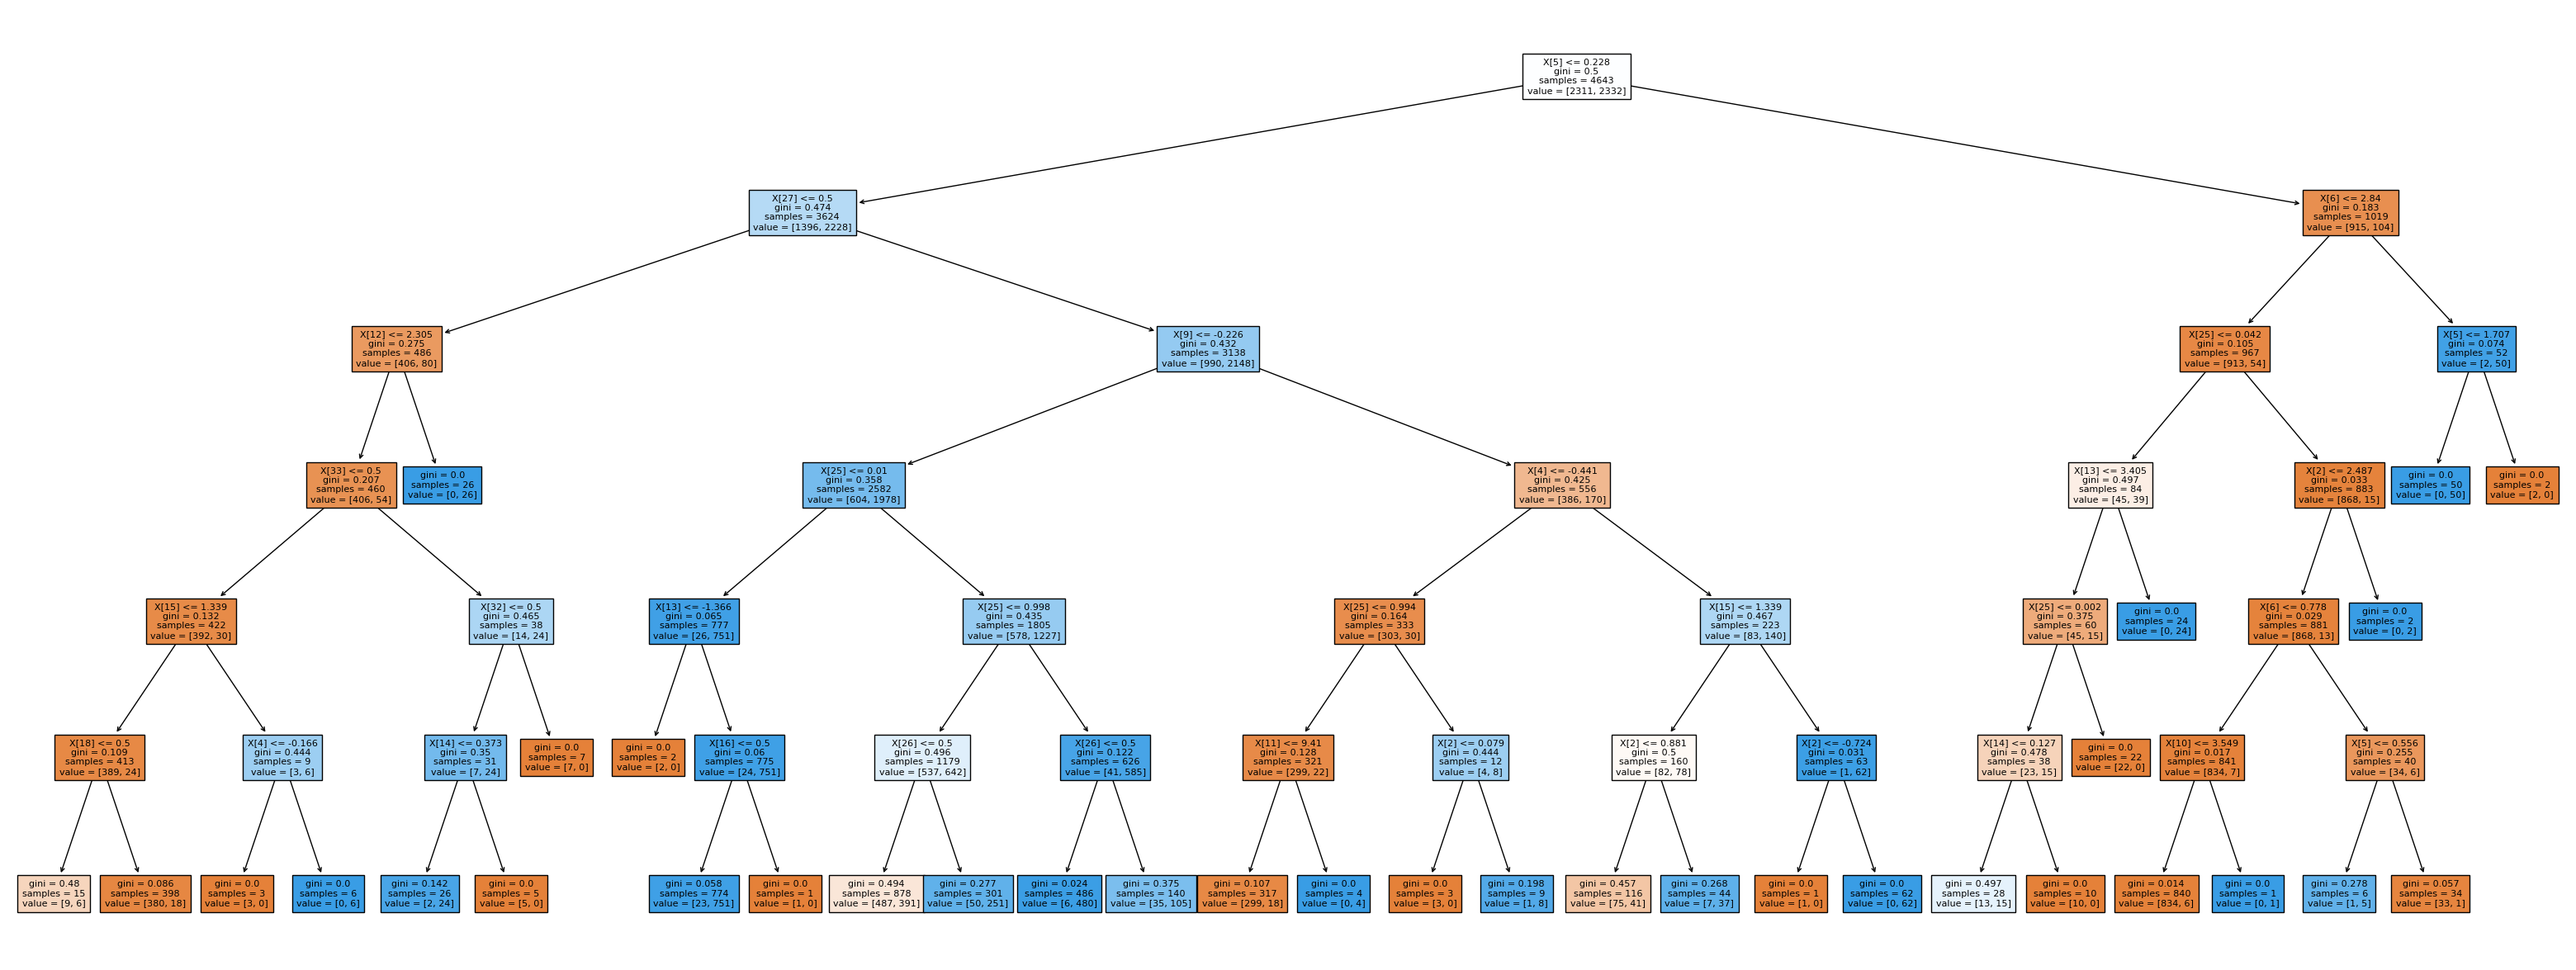

In [2]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=(6))
#
Y=dfTrain3['CLASS_LABEL']
X=dfTrain3[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized','AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]

plt.figure(figsize=(40,15))
tree.plot_tree(clf.fit(X, Y),filled=True,fontsize=8)
plt.show()


#### Results
These three features are the most influential on the decision tree because they come directly after the root node to split the data best. The lower level that a feature in on the tree the less influential it is on the target. 

##### Most Infulential Feature: 'NumDash_Standardized', X[5]
The decision tree above shows that X[5], 'NumDash_Standardized' is the most influential feature. This is because it is the root node, the beginning of the tree. If 'NumDash_standardized' is <=0.228 then is is classified as belonging to class 0. Of the total 4643 events, 2311 of them are in class 0 based on 'NumDash_Standardized'.

##### Second Most Infulential Feature: 'PctExtResourceUrls', X[27]
The next branch in the above tree is split from:
'NumDash_Standardized' <=0.228 
There are 3624 samples where this is True. The next division of the tree is for 'PctExtResourceUrls' <=0.5 as it is a Binary feature. For 'PctExtResourceUrls', <=0.5 there are 1396 of 3624 cases. This feature was able to split 3624 samples from the root node ('NumDash_Standardized') making it the second most inflluential feature on the target variable. 

##### Third Most Infulential Feature: ' NumDashInHostname_Standardized', X[6]
The next branch is from 'NumDashInHostname_Standardized' which has 1019 samples which is much less than the second most influential feature, 'PctExtResourceUrls' which had 3624 cases split from the root node. This feature is split by 'NumDashInHostname_Standardized' <= 2.84. Of the 1019 cases, 915 of them have 'NumDashInHostname_Standardized' <= 2.84 while the other 104 are >2.84.


### Increase confidence in influential feature selection from decision tree above

### Decision tree infulential features vs. previous feature selection
Next, we will compare the most influential features chosen by the decision tree compared to the features chosen in the previous phases. Has the decision tree confirmed the selection of features from the previous phase or should other, more influential features be added now?
##### Features by Decision Tree:
'NumDash_Standardized', 'PctExtResourceUrls', 'NumDashInHostname_Standardized'
##### Features chosen from prior phases:
1. 'DomainInPaths' | Binary
2. 'RandomString' | Binary
3. 'InsecureForms' | Binary
4. 'NumDash_Standardized' | Numerical
5. 'PathLength_Standardized' | Numerical
6. 'UrlLength_Standardized' | Numerical
7. 'PathLevel_Standardized' | Numerical

Of the 3 most influential features chosen by the decision tree above, only 1 was chosen by previous phases, 'NumDash_Standardized'. To investigate the why the other 2 were not chosen in the prior phases, first do a correlation heatmap to see if the remaning 2 features selected in the decision tree are strongly correlated to the features chosen previously.

<AxesSubplot:>

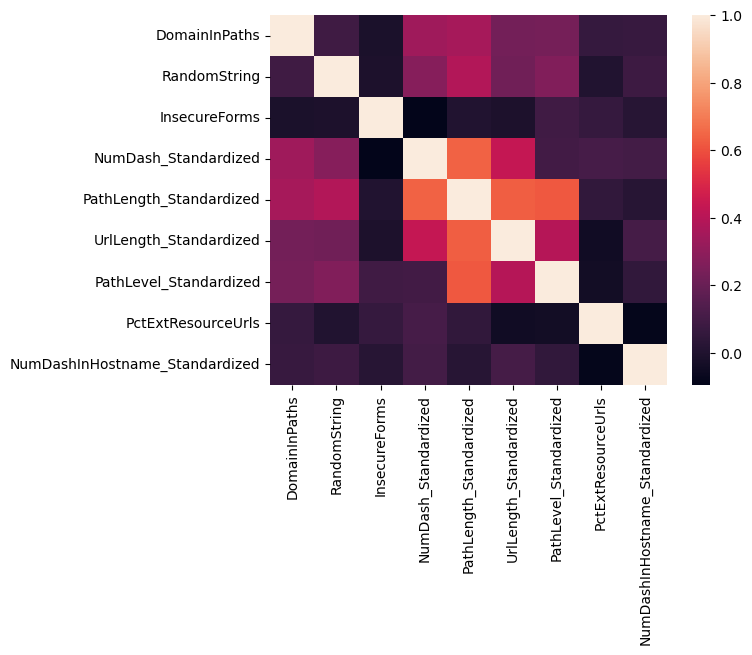

In [3]:
# Create df of all features selected from previous phase
chosenColsPhase3 = dfTrain3[['DomainInPaths','RandomString','InsecureForms','NumDash_Standardized','PathLength_Standardized','UrlLength_Standardized','PathLevel_Standardized']]
# Create df of top 2 influential features from decision tree ('NumDash_Standardized') is not included here because it already exist in previous df from above. 
chosenColsTree = dfTrain3[['PctExtResourceUrls','NumDashInHostname_Standardized']]
chosenColsAll = chosenColsPhase3.join(chosenColsTree) # Join both df together

# Create heatmap of correlation between previously chosen features and top features from decision tree
corr=chosenColsAll.corr()
sns.heatmap(corr)

The results from the correlation heatmap show that the 2 new features chosen by the decision tree, 'NumDashInHostName_Standardized' & 'PctExtResourceUrls' do NOT have good correlation with the previously chosen variables. On the Y-axis, looking at both 'NumDashInHostName_Standardized' & 'PctExtResourceUrls' shows very little correlation with the other chosen features.

This shows that these two features are not correlated to the other features and we know they have a big influence on the target variable and they should be added to the selected features list and two others show be removed from the selected features that were chosen in the previous phase. 

##### Perform new chosen feature variability check
Plot the variablitiy of new features: 'NumDashInHostname_Standardized' & 'PctExtResourceUrls'

##### Variability plot of 'NumDashInHostname_Standardized' 

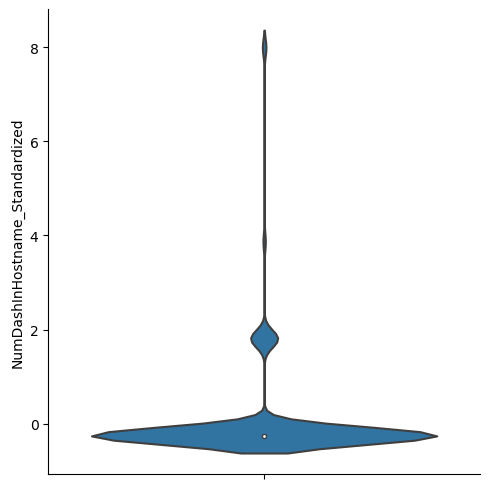

In [4]:
sns.catplot(y='NumDashInHostname_Standardized', kind='violin', log_scale=True, data=dfTrain3)

##### Results
This plot shows little variability in 'NumDashInHostname_Standardized'. This may not make a great feature selection. 

##### Plot variability of 'PctExtResourceUrls'

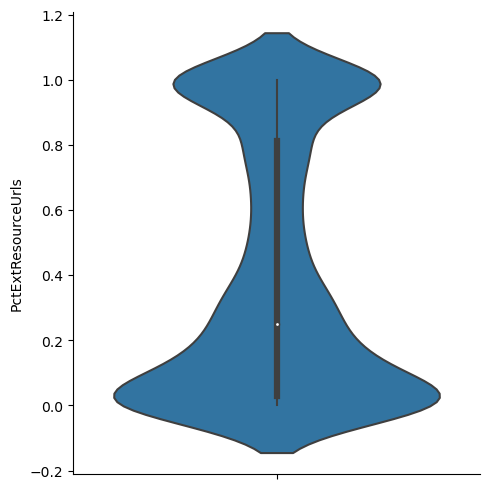

In [5]:
sns.catplot(y='PctExtResourceUrls', kind='violin', log_scale=True, data=dfTrain3)

##### Results
This plot shows good variability in 'PctExtResourceUrls'. This would make a good feature selection and should be added to selected feature list. 

### Final Feature Selection:
1. 'DomainInPaths' | Binary
2. 'RandomString' | Binary
3. 'InsecureForms' | Binary
4. 'NumDash_Standardized' | Numerical
5. 'PctExtResourceUrls' | Numerical
6. 'UrlLength_Standardized' | Numerical
7. 'PathLevel_Standardized' | Numerical

## Phase IV: Part B
### Perform Grid Search
Grid search using K-fold cross validation. 
This will provide the following parameters: 
1. 'min_samples_splits'
2. 'mean_test_score'
3. 'mean_test_f1'
4. 'mean_test_recall'

These parameters will be used in calculating the best 'min_sample_split' to use in calculating AUC, Recall & Precision. 

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

Y=dfTrain3['CLASS_LABEL']
X=dfTrain3[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized','AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]

min_samples_splits = np.linspace(0.1,1.0,35, endpoint = True) 
print(min_samples_splits)

tuned_parameters = [{'min_samples_split':min_samples_splits}]

base_model = tree.DecisionTreeClassifier()

clf = GridSearchCV(estimator=base_model, param_grid=tuned_parameters, cv = 5, verbose = 3)
clf.fit(X,Y)
print(clf.cv_results_['mean_test_score'])
scores = ['precision','recall','f1']

clf = GridSearchCV(base_model, tuned_parameters,cv=5,scoring=scores, refit='f1', verbose=3)
clf.fit(X,Y) 

print(clf.cv_results_['mean_test_f1'])
print(clf.cv_results_['mean_test_recall'])
print(clf.cv_results_['mean_test_recall'])



[0.1        0.12647059 0.15294118 0.17941176 0.20588235 0.23235294
 0.25882353 0.28529412 0.31176471 0.33823529 0.36470588 0.39117647
 0.41764706 0.44411765 0.47058824 0.49705882 0.52352941 0.55
 0.57647059 0.60294118 0.62941176 0.65588235 0.68235294 0.70882353
 0.73529412 0.76176471 0.78823529 0.81470588 0.84117647 0.86764706
 0.89411765 0.92058824 0.94705882 0.97352941 1.        ]
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .............min_samples_split=0.1;, score=0.860 total time=   0.0s
[CV 2/5] END .............min_samples_split=0.1;, score=0.882 total time=   0.0s
[CV 3/5] END .............min_samples_split=0.1;, score=0.858 total time=   0.0s
[CV 4/5] END .............min_samples_split=0.1;, score=0.851 total time=   0.0s
[CV 5/5] END .............min_samples_split=0.1;, score=0.858 total time=   0.0s
[CV 1/5] END min_samples_split=0.1264705882352941;, score=0.851 total time=   0.0s
[CV 2/5] END min_samples_split=0.1264705882352941;, score=0.862 

[CV 4/5] END min_samples_split=0.6823529411764706;, score=0.714 total time=   0.0s
[CV 5/5] END min_samples_split=0.6823529411764706;, score=0.752 total time=   0.0s
[CV 1/5] END min_samples_split=0.7088235294117646;, score=0.755 total time=   0.0s
[CV 2/5] END min_samples_split=0.7088235294117646;, score=0.755 total time=   0.0s
[CV 3/5] END min_samples_split=0.7088235294117646;, score=0.744 total time=   0.0s
[CV 4/5] END min_samples_split=0.7088235294117646;, score=0.714 total time=   0.0s
[CV 5/5] END min_samples_split=0.7088235294117646;, score=0.752 total time=   0.0s
[CV 1/5] END min_samples_split=0.7352941176470588;, score=0.691 total time=   0.0s
[CV 2/5] END min_samples_split=0.7352941176470588;, score=0.755 total time=   0.0s
[CV 3/5] END min_samples_split=0.7352941176470588;, score=0.744 total time=   0.0s
[CV 4/5] END min_samples_split=0.7352941176470588;, score=0.714 total time=   0.0s
[CV 5/5] END min_samples_split=0.7352941176470588;, score=0.752 total time=   0.0s
[CV 

[CV 1/5] END min_samples_split=0.2323529411764706; f1: (test=0.830) precision: (test=0.776) recall: (test=0.893) total time=   0.0s
[CV 2/5] END min_samples_split=0.2323529411764706; f1: (test=0.814) precision: (test=0.941) recall: (test=0.717) total time=   0.0s
[CV 3/5] END min_samples_split=0.2323529411764706; f1: (test=0.790) precision: (test=0.928) recall: (test=0.687) total time=   0.0s
[CV 4/5] END min_samples_split=0.2323529411764706; f1: (test=0.753) precision: (test=0.914) recall: (test=0.639) total time=   0.0s
[CV 5/5] END min_samples_split=0.2323529411764706; f1: (test=0.766) precision: (test=0.932) recall: (test=0.650) total time=   0.0s
[CV 1/5] END min_samples_split=0.2588235294117647; f1: (test=0.816) precision: (test=0.772) recall: (test=0.865) total time=   0.0s
[CV 2/5] END min_samples_split=0.2588235294117647; f1: (test=0.805) precision: (test=0.772) recall: (test=0.842) total time=   0.0s
[CV 3/5] END min_samples_split=0.2588235294117647; f1: (test=0.815) precisio

[CV 4/5] END min_samples_split=0.5764705882352941; f1: (test=0.781) precision: (test=0.737) recall: (test=0.830) total time=   0.0s
[CV 5/5] END min_samples_split=0.5764705882352941; f1: (test=0.810) precision: (test=0.781) recall: (test=0.841) total time=   0.0s
[CV 1/5] END min_samples_split=0.6029411764705882; f1: (test=0.771) precision: (test=0.725) recall: (test=0.822) total time=   0.0s
[CV 2/5] END min_samples_split=0.6029411764705882; f1: (test=0.805) precision: (test=0.772) recall: (test=0.842) total time=   0.0s
[CV 3/5] END min_samples_split=0.6029411764705882; f1: (test=0.815) precision: (test=0.771) recall: (test=0.865) total time=   0.0s
[CV 4/5] END min_samples_split=0.6029411764705882; f1: (test=0.781) precision: (test=0.737) recall: (test=0.830) total time=   0.0s
[CV 5/5] END min_samples_split=0.6029411764705882; f1: (test=0.810) precision: (test=0.781) recall: (test=0.841) total time=   0.0s
[CV 1/5] END min_samples_split=0.6294117647058823; f1: (test=0.771) precisio

#### Graph the min_samples_splits and mean f1 scores
This will show a good 'min_sample_splits' to use for the other calculations. 

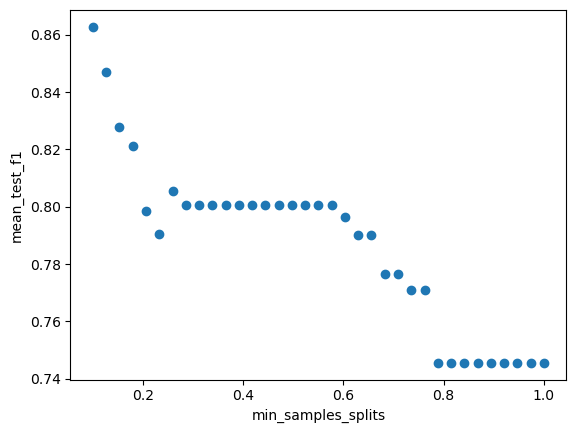

In [7]:
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_f1'])
plt.ylabel('mean_test_f1')
plt.xlabel('min_samples_splits')
plt.show()

The plot shows that splits of .4 will return a good F1 score 
Current Parameters to be used:

min_samples_splits = .4

max_depth = 8

#### Calculate AUC score

In [8]:
# AUC score
clf = tree.DecisionTreeClassifier(min_samples_split=0.4)
clf = clf.fit(X,Y)
Y_predicted = clf.predict(X)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

auc = roc_auc_score(Y,Y_predicted)
print(auc)

0.7934201258356447


AUC score = .8

#### Calculate Recall
Recall shows which proportion of actual positives the model can properly identify. The recall score will give the grand truth of the model.

Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV 1/4] END min_samples_split=0.1; f1: (test=0.865) precision: (test=0.853) recall: (test=0.877) total time=   0.0s
[CV 2/4] END min_samples_split=0.1; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1; f1: (test=0.851) precision: (test=0.855) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.1; f1: (test=0.851) precision: (test=0.891) recall: (test=0.815) total time=   0.0s
[CV 1/4] END min_samples_split=0.1264705882352941; f1: (test=0.838) precision: (test=0.868) recall: (test=0.810) total time=   0.0s
[CV 2/4] END min_samples_split=0.1264705882352941; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1264705882352941; f1: (test=0.827) precision: (test=0.885) recall: (test=0.777) total time=   0.0s
[CV 4/4] END min_samples_split=0.1264705882352941; f1: (test=0.794) precis

[CV 3/4] END min_samples_split=0.6823529411764706; f1: (test=0.771) precision: (test=0.666) recall: (test=0.914) total time=   0.0s
[CV 4/4] END min_samples_split=0.6823529411764706; f1: (test=0.787) precision: (test=0.694) recall: (test=0.907) total time=   0.0s
[CV 1/4] END min_samples_split=0.7088235294117646; f1: (test=0.769) precision: (test=0.699) recall: (test=0.856) total time=   0.0s
[CV 2/4] END min_samples_split=0.7088235294117646; f1: (test=0.781) precision: (test=0.701) recall: (test=0.882) total time=   0.0s
[CV 3/4] END min_samples_split=0.7088235294117646; f1: (test=0.771) precision: (test=0.666) recall: (test=0.914) total time=   0.0s
[CV 4/4] END min_samples_split=0.7088235294117646; f1: (test=0.787) precision: (test=0.694) recall: (test=0.907) total time=   0.0s
[CV 1/4] END min_samples_split=0.7352941176470588; f1: (test=0.741) precision: (test=0.635) recall: (test=0.889) total time=   0.0s
[CV 2/4] END min_samples_split=0.7352941176470588; f1: (test=0.781) precisio

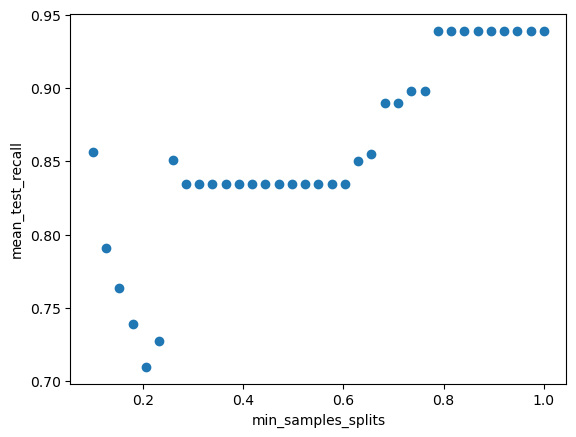

[0.85634648 0.79073756 0.76329331 0.73885077 0.70969125 0.72727273
 0.85120069 0.83447684 0.83447684 0.83447684 0.83447684 0.83447684
 0.83447684 0.83447684 0.83447684 0.83447684 0.83447684 0.83447684
 0.83447684 0.83447684 0.84991424 0.85506003 0.88979417 0.88979417
 0.89794168 0.89794168 0.93910806 0.93910806 0.93910806 0.93910806
 0.93910806 0.93910806 0.93910806 0.93910806 0.93910806]


In [9]:
# Recall 
clf = GridSearchCV(base_model, tuned_parameters,cv=4,scoring=scores, refit='recall', verbose=3)
clf.fit(X,Y)

# Plot mean recall scores
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_recall'])
plt.ylabel('mean_test_recall')
plt.xlabel('min_samples_splits')
plt.show()
print(clf.cv_results_['mean_test_recall'])

##### Results:
recall score when min_samples_splits=.4 is .83

#### Calculate Precision 
Precision shows when the model predicts a case as the positive class, how often is the model correct? In a classification problem, precision is the faction of the positive class that the classification model got right.

Precision = TP / (TP + FP)

Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV 1/4] END min_samples_split=0.1; f1: (test=0.865) precision: (test=0.853) recall: (test=0.877) total time=   0.0s
[CV 2/4] END min_samples_split=0.1; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1; f1: (test=0.851) precision: (test=0.855) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.1; f1: (test=0.852) precision: (test=0.891) recall: (test=0.816) total time=   0.0s
[CV 1/4] END min_samples_split=0.1264705882352941; f1: (test=0.838) precision: (test=0.868) recall: (test=0.810) total time=   0.0s
[CV 2/4] END min_samples_split=0.1264705882352941; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1264705882352941; f1: (test=0.827) precision: (test=0.885) recall: (test=0.777) total time=   0.0s
[CV 4/4] END min_samples_split=0.1264705882352941; f1: (test=0.794) precis

[CV 3/4] END min_samples_split=0.5764705882352941; f1: (test=0.797) precision: (test=0.752) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.5764705882352941; f1: (test=0.806) precision: (test=0.779) recall: (test=0.835) total time=   0.0s
[CV 1/4] END min_samples_split=0.6029411764705882; f1: (test=0.788) precision: (test=0.782) recall: (test=0.794) total time=   0.0s
[CV 2/4] END min_samples_split=0.6029411764705882; f1: (test=0.811) precision: (test=0.766) recall: (test=0.861) total time=   0.0s
[CV 3/4] END min_samples_split=0.6029411764705882; f1: (test=0.797) precision: (test=0.752) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.6029411764705882; f1: (test=0.806) precision: (test=0.779) recall: (test=0.835) total time=   0.0s
[CV 1/4] END min_samples_split=0.6294117647058823; f1: (test=0.769) precision: (test=0.699) recall: (test=0.856) total time=   0.0s
[CV 2/4] END min_samples_split=0.6294117647058823; f1: (test=0.811) precisio

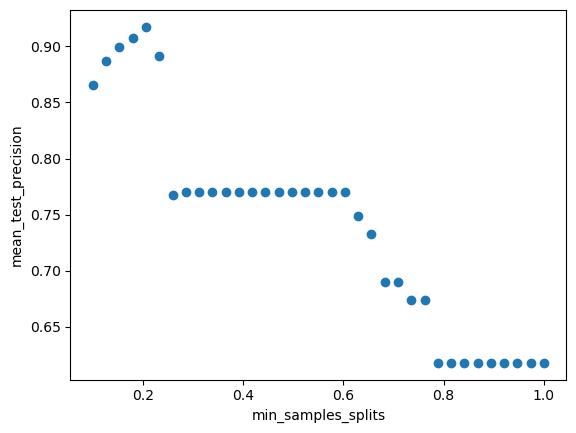

[0.86520305 0.88724077 0.89921134 0.90780799 0.91746578 0.89118755
 0.76745562 0.76990235 0.76990235 0.76990235 0.76990235 0.76990235
 0.76990235 0.76990235 0.76990235 0.76990235 0.76990235 0.76990235
 0.76990235 0.76990235 0.74909859 0.73280249 0.69014578 0.69014578
 0.67412687 0.67412687 0.61793518 0.61793518 0.61793518 0.61793518
 0.61793518 0.61793518 0.61793518 0.61793518 0.61793518]


In [10]:
# Precision scores & Plot
clf = GridSearchCV(base_model, tuned_parameters,cv=4,scoring=scores, refit='precision', verbose=3)
clf.fit(X,Y)
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_precision'])
plt.ylabel('mean_test_precision')
plt.xlabel('min_samples_splits')
plt.show()
print(clf.cv_results_['mean_test_precision'])

##### Results:
When min_samples_splits=.4 precision=0.76

#### Calculate F1 Scores

Precision & Recall are inverse of one another, improving the precision in the model will come at the expense of the recall and vice versa. To see the link between these two parameters, we calculate the F1 score. 

Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV 1/4] END min_samples_split=0.1; f1: (test=0.865) precision: (test=0.853) recall: (test=0.877) total time=   0.0s
[CV 2/4] END min_samples_split=0.1; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1; f1: (test=0.851) precision: (test=0.855) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.1; f1: (test=0.852) precision: (test=0.891) recall: (test=0.816) total time=   0.0s
[CV 1/4] END min_samples_split=0.1264705882352941; f1: (test=0.838) precision: (test=0.868) recall: (test=0.810) total time=   0.0s
[CV 2/4] END min_samples_split=0.1264705882352941; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1264705882352941; f1: (test=0.827) precision: (test=0.885) recall: (test=0.777) total time=   0.0s
[CV 4/4] END min_samples_split=0.1264705882352941; f1: (test=0.794) precis

[CV 1/4] END min_samples_split=0.5235294117647059; f1: (test=0.788) precision: (test=0.782) recall: (test=0.794) total time=   0.0s
[CV 2/4] END min_samples_split=0.5235294117647059; f1: (test=0.811) precision: (test=0.766) recall: (test=0.861) total time=   0.0s
[CV 3/4] END min_samples_split=0.5235294117647059; f1: (test=0.797) precision: (test=0.752) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.5235294117647059; f1: (test=0.806) precision: (test=0.779) recall: (test=0.835) total time=   0.0s
[CV 1/4] END min_samples_split=0.55; f1: (test=0.788) precision: (test=0.782) recall: (test=0.794) total time=   0.0s
[CV 2/4] END min_samples_split=0.55; f1: (test=0.811) precision: (test=0.766) recall: (test=0.861) total time=   0.0s
[CV 3/4] END min_samples_split=0.55; f1: (test=0.797) precision: (test=0.752) recall: (test=0.847) total time=   0.0s
[CV 4/4] END min_samples_split=0.55; f1: (test=0.806) precision: (test=0.779) recall: (test=0.835) total time=   0.0s


[CV 1/4] END min_samples_split=0.9735294117647059; f1: (test=0.741) precision: (test=0.635) recall: (test=0.889) total time=   0.0s
[CV 2/4] END min_samples_split=0.9735294117647059; f1: (test=0.755) precision: (test=0.621) recall: (test=0.964) total time=   0.0s
[CV 3/4] END min_samples_split=0.9735294117647059; f1: (test=0.733) precision: (test=0.598) recall: (test=0.945) total time=   0.0s
[CV 4/4] END min_samples_split=0.9735294117647059; f1: (test=0.751) precision: (test=0.618) recall: (test=0.959) total time=   0.0s
[CV 1/4] END min_samples_split=1.0; f1: (test=0.741) precision: (test=0.635) recall: (test=0.889) total time=   0.0s
[CV 2/4] END min_samples_split=1.0; f1: (test=0.755) precision: (test=0.621) recall: (test=0.964) total time=   0.0s
[CV 3/4] END min_samples_split=1.0; f1: (test=0.733) precision: (test=0.598) recall: (test=0.945) total time=   0.0s
[CV 4/4] END min_samples_split=1.0; f1: (test=0.751) precision: (test=0.618) recall: (test=0.959) total time=   0.0s


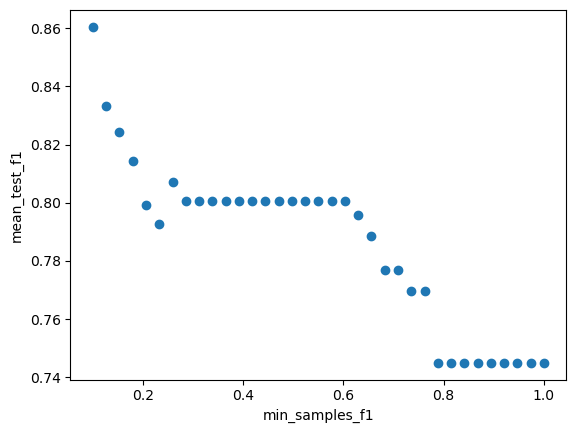

[0.86048967 0.83318761 0.82416429 0.81431961 0.79937297 0.7927797
 0.80708129 0.80053404 0.80053404 0.80053404 0.80053404 0.80053404
 0.80053404 0.80053404 0.80053404 0.80053404 0.80053404 0.80053404
 0.80053404 0.80053404 0.79587976 0.78842215 0.77700707 0.77700707
 0.7697723  0.7697723  0.74499054 0.74499054 0.74499054 0.74499054
 0.74499054 0.74499054 0.74499054 0.74499054 0.74499054]


In [11]:
# F1 score
clf = GridSearchCV(base_model, tuned_parameters,cv=4,scoring=scores, refit='f1', verbose=3)
clf.fit(X,Y) 
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_f1'])
plt.ylabel('mean_test_f1')
plt.xlabel('min_samples_f1')
plt.show()
print(clf.cv_results_['mean_test_f1'])

##### Results:
When min_sample_splits=0.4 the F1 score is 0.80

### Plot ROC curve

The ROC curve will provide a good visualization for the false positive rate against the true positive rate. A model that has a perfectly diagnal line is no better than a 50/50 guess and is not a good model. The more the line bends into the upper left the better the model is. The closer the AUC (area under the curve) is to 1, the better.

/Users/jprince/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


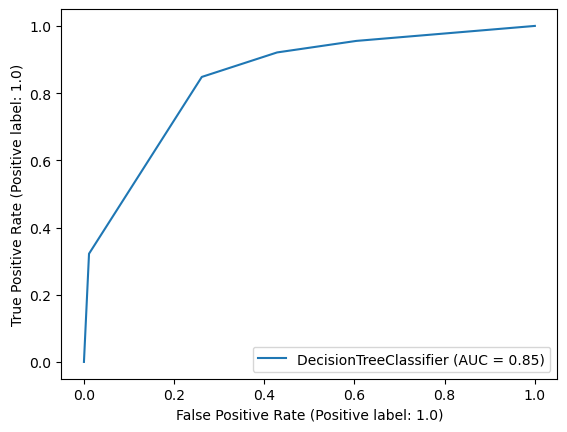

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
Y=dfTrain3['CLASS_LABEL']
X=dfTrain3[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized','AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
clf=tree.DecisionTreeClassifier(min_samples_split=0.4,max_depth=8)
clf=clf.fit(X,Y)
Y_predicted = clf.predict(X)
auc = roc_auc_score(Y,Y_predicted)
plot_roc_curve(clf,X,Y)

This is an encouraging ROC plot, the AUC = .85 which is a good model. It shows that the model is much better than a random guess, the more the line bends toward the upper left the better it is. The image below describes how the ROC curve should look in more detail. 

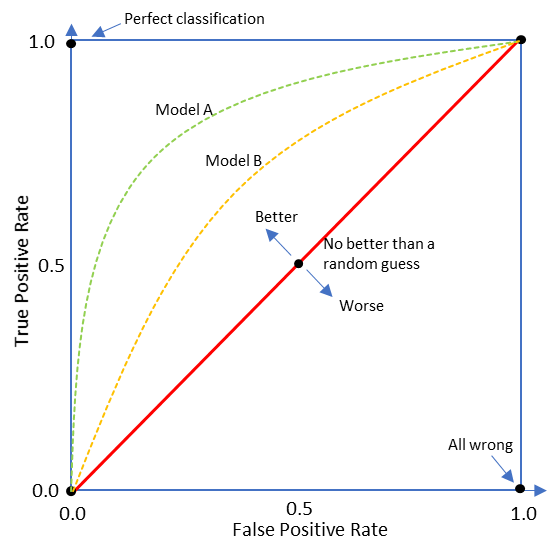

### Final Metrics Table

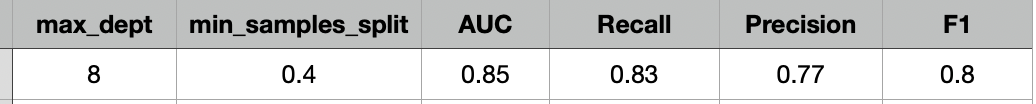

## Phase IV: Executive Summary



Carefully utilizing the dataset provided to proactively protect the organization from malicious websites will be beneficial. This report suggest that a malicious website identification tool can be built that is both effective and will not slow down internet traffic or require powerful security hardware. This dataset contains enough cases and relevant features to build or update a malicious website filter for the company. This data is vast and not all of it should be used to build a predictive model, the report summarizes that utilizing only seven features can be used to build a comprehensive malicious website tool. This will reduce the load on firewalls by maximizing the effectiveness of each chosen feature to filter website data. The report shows that the model is much better at predicting malicious websites than random guessing, a AUC score of .85 was achieved, compared to .50 of a random guess (1.0 is perfect prediction). Building a malicious website tool utilizing this data has the potential to reduce our risk by 85%, saving the IT staff time, resources and keeping employees productive.